In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
from scipy.stats import linregress
from api_keys import weather_api_key
import time
import pprint as pp

In [3]:
#random selection of lat/lng and matching cities
lat_range = (-90, 90)
lng_range = (-180, 180)
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)

lon = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lat, lon)

cities=[]
for coords in lat_lngs:
    latitude = coords[0]
    longitude = coords[1]
    #from citipy documentation https://github.com/wingchen/citipy
    location = citipy.nearest_city(latitude, longitude)
    # city nearest to randomly generated coordinates
    city_name=location.city_name
    # country code
    country_code=location.country_code

    ## print to make sure the city returned matches a country
    # print(city_name,',',country_code)

    # city/country combo seemed to be ok, but we only need to provide a city to the api, so this gets saved in a list to query later
    if city_name not in cities:
        cities.append(city_name)
#check count of cities
print(len(cities))

603


In [42]:
# # # test json response for weather api
# # # units='imperial'
# # # weather_url=f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units={units}'
# # # from api_keys import weather_api_key

# # # test lat/lon for fairhope,alabama 30.5230° N, 87.9033° W
# # weather_api_key="3974be9fa6e0d0ba48004fb47c9abbeb"
# units='imperial'
# api_key=weather_api_key
# lat=30.5230
# lon=-87.9033

# # TEST ##
# # weather api url
# url=f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units={units}'
# # url=f'https://api.openweathermap.org/data/2.5/weather?{params}'
# response=requests.get(url)
# fairhope_weather=response.json()
# print(response.url)
# pp.pprint(fairhope_weather)

# # set up variables to use to loop through cities list
# info=fairhope_weather
# latitude=info['coord']['lat']
# longitude=info['coord']['lon']
# desc=info['weather'][0]['description']
# max_temp=info['main']['temp_max']
# humidity=info['main']['humidity']
# clouds=info['clouds']['all']
# wind = info['wind']['speed']
# # city_name=info['City']
# country=info['sys']['country']
# city_date=info['dt']
# # dictionary of retrieved data
# city_data_dict={
#     # "City Name": city_name,
#     "Country": country,
#     "City Lat":latitude,
#     "City Lon" :longitude,
#     "Max Temp" : max_temp,
#     "Wind": wind,
#     "City Date" : city_date,
#     "Humidity" : humidity,
#     "Clouds" : clouds,
#     "Description": desc,

# }
# pp.pprint(city_data_dict)


In [4]:
city_data=[]
record_groups=1
records_attempt=1
# loop through cities list and return dataframe of info
for index, city in enumerate(cities):
    records_attempt+=1
    if (index % 50 == 0 ) and (index >=50):        
        record_groups+1
        records_attempt=0
    #print(f'{city} is the {records_attempt} attempt and resulting datapoint for the {record_groups} group of api query attempted')


    # url call based on city name alone, no lat and lon required
    ## source: https://stackoverflow.com/questions/65373299/how-can-i-use-city-name-instead-of-lat-and-log-in-openweather-api
    # api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    base_url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

    try:
        url=f'{base_url}&q={city}'
        # url=f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
        # url=f'https://api.openweathermap.org/data/2.5/weather?q={city}&APPID={weather_api_key}'
        response=requests.get(url)
        #print(response.url)
        info=response.json()
        #pp.pprint(info)
        # variables for curated information
        city_name=info['name']
#         print(city_name)

        latitude=info['coord']['lat']
#         print(latitude)
        longitude=info['coord']['lon']
#         print(longitude)
        desc=info['weather'][0]['description']
#         print(desc)
        max_temp=info['main']['temp_max']
#         print(max_temp)
        humidity=info['main']['humidity']
        # print(humidity)
        clouds=info['clouds']['all']
        # print(clouds)
        wind = info['wind']['speed']
        # print(wind)        
        country=info['sys']['country']
#         print(country)
        city_date=info['dt']
#         print(city_date)

        #dictionary 
        city_data_info={
            "City Name": city_name,
            "Country": country,
            "City Lat":latitude,
            "City Lon" :longitude,
            "Max Temp" : max_temp,
            "Wind": wind,
            "Date" : city_date,
            "Humidity" : humidity,
            "Cloudiness" : clouds,
            "Description": desc,

        }
        print(city_data_info)
        city_data.append(city_data_info)
        print(city_name, country, wind)
        
    except:
        # print(f'url for {city} not found, skipping!')
        pass
    
    
print(city_data)
print('------------------------------------------------------------------')
print(f'found in total: {len(city_data)} different city weather records')
print('------------------------------------------------------------------')
print('sending to csv')
df=pd.DataFrame(city_data)
df.to_csv('output/cities_weather.csv',index_label="City_ID")

{'City Name': 'Blackmans Bay', 'Country': 'AU', 'City Lat': -43.0167, 'City Lon': 147.3167, 'Max Temp': 16.96, 'Wind': 1.06, 'Date': 1703680656, 'Humidity': 87, 'Cloudiness': 84, 'Description': 'broken clouds'}
Blackmans Bay AU 1.06
{'City Name': 'La Passe', 'Country': 'FR', 'City Lat': 45.5549, 'City Lon': -0.8967, 'Max Temp': 10.13, 'Wind': 4.21, 'Date': 1703680656, 'Humidity': 59, 'Cloudiness': 89, 'Description': 'overcast clouds'}
La Passe FR 4.21
{'City Name': 'Mpulungu', 'Country': 'ZM', 'City Lat': -8.7623, 'City Lon': 31.1141, 'Max Temp': 21.52, 'Wind': 2.26, 'Date': 1703680656, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'light rain'}
Mpulungu ZM 2.26
{'City Name': 'Solnechnyy', 'Country': 'RU', 'City Lat': 50.7214, 'City Lon': 136.6319, 'Max Temp': -29.98, 'Wind': 1.58, 'Date': 1703680657, 'Humidity': 93, 'Cloudiness': 20, 'Description': 'few clouds'}
Solnechnyy RU 1.58
{'City Name': 'Baise City', 'Country': 'CN', 'City Lat': 23.8997, 'City Lon': 106.6133, 'Max Temp': 1

{'City Name': 'Stanley', 'Country': 'GB', 'City Lat': 54.868, 'City Lon': -1.6985, 'Max Temp': 9.29, 'Wind': 4.12, 'Date': 1703680667, 'Humidity': 100, 'Cloudiness': 75, 'Description': 'light rain'}
Stanley GB 4.12
{'City Name': 'East London', 'Country': 'ZA', 'City Lat': -33.0153, 'City Lon': 27.9116, 'Max Temp': 17.52, 'Wind': 6.17, 'Date': 1703680667, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'light rain'}
East London ZA 6.17
{'City Name': 'Akjoujt', 'Country': 'MR', 'City Lat': 19.6969, 'City Lon': -14.4164, 'Max Temp': 33.2, 'Wind': 2.33, 'Date': 1703680667, 'Humidity': 9, 'Cloudiness': 0, 'Description': 'clear sky'}
Akjoujt MR 2.33
{'City Name': 'San Patricio', 'Country': 'US', 'City Lat': 28.017, 'City Lon': -97.5169, 'Max Temp': 14.92, 'Wind': 3.64, 'Date': 1703680667, 'Humidity': 72, 'Cloudiness': 100, 'Description': 'overcast clouds'}
San Patricio US 3.64
{'City Name': 'Nautanwa', 'Country': 'IN', 'City Lat': 27.4333, 'City Lon': 83.4167, 'Max Temp': 18.78, 'Wind': 1.

{'City Name': 'Kingston', 'Country': 'JM', 'City Lat': 17.997, 'City Lon': -76.7936, 'Max Temp': 25.53, 'Wind': 2.57, 'Date': 1703680546, 'Humidity': 78, 'Cloudiness': 20, 'Description': 'few clouds'}
Kingston JM 2.57
{'City Name': 'Iskateley', 'Country': 'RU', 'City Lat': 67.6803, 'City Lon': 53.1512, 'Max Temp': -11.57, 'Wind': 3.4, 'Date': 1703680675, 'Humidity': 95, 'Cloudiness': 21, 'Description': 'few clouds'}
Iskateley RU 3.4
{'City Name': 'Badger', 'Country': 'US', 'City Lat': 64.8, 'City Lon': -147.5333, 'Max Temp': -26.05, 'Wind': 2.57, 'Date': 1703680675, 'Humidity': 76, 'Cloudiness': 0, 'Description': 'clear sky'}
Badger US 2.57
{'City Name': 'Susuman', 'Country': 'RU', 'City Lat': 62.7833, 'City Lon': 148.1667, 'Max Temp': -38.63, 'Wind': 0.55, 'Date': 1703680403, 'Humidity': 100, 'Cloudiness': 93, 'Description': 'overcast clouds'}
Susuman RU 0.55
{'City Name': 'La Ronge', 'Country': 'CA', 'City Lat': 55.1001, 'City Lon': -105.2842, 'Max Temp': -4.86, 'Wind': 2.06, 'Date':

{'City Name': 'Hermanus', 'Country': 'ZA', 'City Lat': -34.4187, 'City Lon': 19.2345, 'Max Temp': 27.11, 'Wind': 9.87, 'Date': 1703680682, 'Humidity': 44, 'Cloudiness': 99, 'Description': 'overcast clouds'}
Hermanus ZA 9.87
{'City Name': 'Saipan', 'Country': 'MP', 'City Lat': 15.1355, 'City Lon': 145.701, 'Max Temp': 27.39, 'Wind': 6.69, 'Date': 1703680683, 'Humidity': 74, 'Cloudiness': 40, 'Description': 'scattered clouds'}
Saipan MP 6.69
{'City Name': 'Plastun', 'Country': 'RU', 'City Lat': 44.7561, 'City Lon': 136.2939, 'Max Temp': -11.97, 'Wind': 3.09, 'Date': 1703680683, 'Humidity': 70, 'Cloudiness': 0, 'Description': 'clear sky'}
Plastun RU 3.09
{'City Name': 'Chonchi', 'Country': 'CL', 'City Lat': -42.6128, 'City Lon': -73.8092, 'Max Temp': 19.03, 'Wind': 2.82, 'Date': 1703680683, 'Humidity': 58, 'Cloudiness': 0, 'Description': 'clear sky'}
Chonchi CL 2.82
{'City Name': 'Ondjiva', 'Country': 'AO', 'City Lat': -17.0667, 'City Lon': 15.7333, 'Max Temp': 33.63, 'Wind': 3.61, 'Date'

{'City Name': 'Nadym', 'Country': 'RU', 'City Lat': 65.5333, 'City Lon': 72.5167, 'Max Temp': -12.25, 'Wind': 5.29, 'Date': 1703680694, 'Humidity': 95, 'Cloudiness': 19, 'Description': 'few clouds'}
Nadym RU 5.29
{'City Name': "Port Saint John's", 'Country': 'ZA', 'City Lat': -31.6229, 'City Lon': 29.5448, 'Max Temp': 19.39, 'Wind': 5.3, 'Date': 1703680694, 'Humidity': 82, 'Cloudiness': 100, 'Description': 'light rain'}
Port Saint John's ZA 5.3
{'City Name': 'Gazojak', 'Country': 'TM', 'City Lat': 41.1875, 'City Lon': 61.4036, 'Max Temp': 8.93, 'Wind': 2.5, 'Date': 1703680694, 'Humidity': 54, 'Cloudiness': 0, 'Description': 'clear sky'}
Gazojak TM 2.5
{'City Name': 'Smithers', 'Country': 'CA', 'City Lat': 54.7804, 'City Lon': -127.1743, 'Max Temp': -3.82, 'Wind': 1.54, 'Date': 1703680515, 'Humidity': 100, 'Cloudiness': 100, 'Description': 'light snow'}
Smithers CA 1.54
{'City Name': 'Fort Bragg', 'Country': 'US', 'City Lat': 35.139, 'City Lon': -79.006, 'Max Temp': 16.01, 'Wind': 0.45,

{'City Name': 'Atafu Village', 'Country': 'TK', 'City Lat': -8.5421, 'City Lon': -172.5159, 'Max Temp': 28.74, 'Wind': 2.11, 'Date': 1703680704, 'Humidity': 76, 'Cloudiness': 100, 'Description': 'moderate rain'}
Atafu Village TK 2.11
{'City Name': 'Fort St. John', 'Country': 'CA', 'City Lat': 56.2499, 'City Lon': -120.8529, 'Max Temp': -4.06, 'Wind': 3.6, 'Date': 1703680705, 'Humidity': 58, 'Cloudiness': 20, 'Description': 'few clouds'}
Fort St. John CA 3.6
{'City Name': 'Skikda', 'Country': 'DZ', 'City Lat': 36.8762, 'City Lon': 6.9092, 'Max Temp': 16.55, 'Wind': 1.96, 'Date': 1703680406, 'Humidity': 58, 'Cloudiness': 38, 'Description': 'scattered clouds'}
Skikda DZ 1.96
{'City Name': 'Benito Juarez', 'Country': 'MX', 'City Lat': 19.385, 'City Lon': -99.165, 'Max Temp': 11.9, 'Wind': 3.09, 'Date': 1703680705, 'Humidity': 62, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Benito Juarez MX 3.09
{'City Name': 'Uzgen', 'Country': 'KG', 'City Lat': 40.7699, 'City Lon': 73.3007, 'Max 

{'City Name': 'Dassun', 'Country': 'PH', 'City Lat': 17.7204, 'City Lon': 121.6816, 'Max Temp': 22.65, 'Wind': 1.49, 'Date': 1703680715, 'Humidity': 93, 'Cloudiness': 59, 'Description': 'broken clouds'}
Dassun PH 1.49
{'City Name': 'Alpena', 'Country': 'US', 'City Lat': 45.0617, 'City Lon': -83.4327, 'Max Temp': 6.18, 'Wind': 2.06, 'Date': 1703680715, 'Humidity': 100, 'Cloudiness': 100, 'Description': 'mist'}
Alpena US 2.06
{'City Name': 'Yuzhno-Kurilsk', 'Country': 'RU', 'City Lat': 44.0306, 'City Lon': 145.8556, 'Max Temp': -2.57, 'Wind': 12.08, 'Date': 1703680716, 'Humidity': 59, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Yuzhno-Kurilsk RU 12.08
{'City Name': 'Kyabé', 'Country': 'TD', 'City Lat': 9.4515, 'City Lon': 18.9449, 'Max Temp': 36.04, 'Wind': 1.56, 'Date': 1703680716, 'Humidity': 12, 'Cloudiness': 65, 'Description': 'broken clouds'}
Kyabé TD 1.56
{'City Name': 'Usoke', 'Country': 'TZ', 'City Lat': -5.1667, 'City Lon': 32.35, 'Max Temp': 20.41, 'Wind': 3.76, 'Date'

{'City Name': 'Lekeitio', 'Country': 'ES', 'City Lat': 43.3666, 'City Lon': -2.5007, 'Max Temp': 18.47, 'Wind': 2.57, 'Date': 1703680725, 'Humidity': 52, 'Cloudiness': 51, 'Description': 'broken clouds'}
Lekeitio ES 2.57
{'City Name': 'Bikenibeu Village', 'Country': 'KI', 'City Lat': 1.3673, 'City Lon': 173.1241, 'Max Temp': 28.34, 'Wind': 2.29, 'Date': 1703680725, 'Humidity': 77, 'Cloudiness': 88, 'Description': 'overcast clouds'}
Bikenibeu Village KI 2.29
{'City Name': 'Shanwei', 'Country': 'CN', 'City Lat': 22.782, 'City Lon': 115.3475, 'Max Temp': 19.18, 'Wind': 3.28, 'Date': 1703680726, 'Humidity': 67, 'Cloudiness': 100, 'Description': 'light rain'}
Shanwei CN 3.28
{'City Name': 'Burley', 'Country': 'US', 'City Lat': 42.5357, 'City Lon': -113.7928, 'Max Temp': -5.02, 'Wind': 5.66, 'Date': 1703680708, 'Humidity': 90, 'Cloudiness': 0, 'Description': 'clear sky'}
Burley US 5.66
{'City Name': 'Kabarnet', 'Country': 'KE', 'City Lat': 0.4919, 'City Lon': 35.743, 'Max Temp': 25.86, 'Wind

{'City Name': 'Ojinaga', 'Country': 'MX', 'City Lat': 29.5667, 'City Lon': -104.4167, 'Max Temp': 0.53, 'Wind': 3.09, 'Date': 1703680734, 'Humidity': 47, 'Cloudiness': 0, 'Description': 'clear sky'}
Ojinaga MX 3.09
{'City Name': 'Prince Rupert', 'Country': 'CA', 'City Lat': 54.3161, 'City Lon': -130.3201, 'Max Temp': 3.83, 'Wind': 1.54, 'Date': 1703680734, 'Humidity': 93, 'Cloudiness': 100, 'Description': 'light rain'}
Prince Rupert CA 1.54
{'City Name': 'Springhill', 'Country': 'US', 'City Lat': 33.006, 'City Lon': -93.4668, 'Max Temp': 2.24, 'Wind': 2.28, 'Date': 1703680734, 'Humidity': 95, 'Cloudiness': 0, 'Description': 'clear sky'}
Springhill US 2.28
{'City Name': 'Lapão', 'Country': 'BR', 'City Lat': -11.3833, 'City Lon': -41.8319, 'Max Temp': 32.37, 'Wind': 1.56, 'Date': 1703680734, 'Humidity': 38, 'Cloudiness': 97, 'Description': 'overcast clouds'}
Lapão BR 1.56
{'City Name': 'Hithadhoo', 'Country': 'MV', 'City Lat': -0.6, 'City Lon': 73.0833, 'Max Temp': 26, 'Wind': 3.52, 'Dat

{'City Name': 'Gunjur', 'Country': 'GM', 'City Lat': 13.2019, 'City Lon': -16.7339, 'Max Temp': 30.78, 'Wind': 4.44, 'Date': 1703680741, 'Humidity': 23, 'Cloudiness': 0, 'Description': 'clear sky'}
Gunjur GM 4.44
{'City Name': 'Fuglafjørður', 'Country': 'FO', 'City Lat': 62.244, 'City Lon': -6.814, 'Max Temp': 4.26, 'Wind': 16.03, 'Date': 1703680741, 'Humidity': 68, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Fuglafjørður FO 16.03
{'City Name': 'Labytnangi', 'Country': 'RU', 'City Lat': 66.6572, 'City Lon': 66.4183, 'Max Temp': -10.17, 'Wind': 7.69, 'Date': 1703680741, 'Humidity': 92, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Labytnangi RU 7.69
{'City Name': 'Conception Bay South', 'Country': 'CA', 'City Lat': 47.4999, 'City Lon': -52.9981, 'Max Temp': -0.7, 'Wind': 5.41, 'Date': 1703680742, 'Humidity': 76, 'Cloudiness': 99, 'Description': 'overcast clouds'}
Conception Bay South CA 5.41
{'City Name': 'Springs', 'Country': 'ZA', 'City Lat': -26.25, 'City Lon': 28.4, 

{'City Name': 'Den Burg', 'Country': 'NL', 'City Lat': 53.0542, 'City Lon': 4.7972, 'Max Temp': 8.89, 'Wind': 6.17, 'Date': 1703680753, 'Humidity': 95, 'Cloudiness': 100, 'Description': 'mist'}
Den Burg NL 6.17
{'City Name': 'Sinabang', 'Country': 'ID', 'City Lat': 2.4803, 'City Lon': 96.3801, 'Max Temp': 27.68, 'Wind': 0.39, 'Date': 1703680753, 'Humidity': 81, 'Cloudiness': 97, 'Description': 'overcast clouds'}
Sinabang ID 0.39
{'City Name': 'Chinchilla', 'Country': 'AU', 'City Lat': -26.75, 'City Lon': 150.6333, 'Max Temp': 24.9, 'Wind': 1.73, 'Date': 1703680753, 'Humidity': 51, 'Cloudiness': 0, 'Description': 'clear sky'}
Chinchilla AU 1.73
{'City Name': 'Prince George', 'Country': 'CA', 'City Lat': 53.9166, 'City Lon': -122.753, 'Max Temp': -1.31, 'Wind': 5.14, 'Date': 1703680753, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Prince George CA 5.14
{'City Name': 'Mergen', 'Country': 'CN', 'City Lat': 49.1833, 'City Lon': 125.2167, 'Max Temp': -24.82, 'Wind': 1

{'City Name': 'Koh Pha Ngan', 'Country': 'TH', 'City Lat': 9.7578, 'City Lon': 100.0291, 'Max Temp': 25.38, 'Wind': 6.35, 'Date': 1703680765, 'Humidity': 71, 'Cloudiness': 71, 'Description': 'broken clouds'}
Koh Pha Ngan TH 6.35
{'City Name': 'Rodolfo Sánchez Taboada', 'Country': 'MX', 'City Lat': 31.7167, 'City Lon': -116.5667, 'Max Temp': 12.96, 'Wind': 1.5, 'Date': 1703680765, 'Humidity': 82, 'Cloudiness': 17, 'Description': 'few clouds'}
Rodolfo Sánchez Taboada MX 1.5
{'City Name': 'Dzhangala', 'Country': 'KZ', 'City Lat': 49.2167, 'City Lon': 50.3333, 'Max Temp': 4.55, 'Wind': 6.19, 'Date': 1703680766, 'Humidity': 96, 'Cloudiness': 100, 'Description': 'light rain'}
Dzhangala KZ 6.19
{'City Name': 'Ocean Shores', 'Country': 'US', 'City Lat': 46.9737, 'City Lon': -124.1563, 'Max Temp': 10.74, 'Wind': 7.15, 'Date': 1703680766, 'Humidity': 86, 'Cloudiness': 0, 'Description': 'clear sky'}
Ocean Shores US 7.15
{'City Name': 'Fortaleza', 'Country': 'BR', 'City Lat': -3.7227, 'City Lon': 

{'City Name': 'Carnarvon', 'Country': 'AU', 'City Lat': -24.8667, 'City Lon': 113.6333, 'Max Temp': 22.89, 'Wind': 8.72, 'Date': 1703680777, 'Humidity': 66, 'Cloudiness': 0, 'Description': 'clear sky'}
Carnarvon AU 8.72
{'City Name': 'Tobarra', 'Country': 'ES', 'City Lat': 38.5921, 'City Lon': -1.6919, 'Max Temp': 8.32, 'Wind': 1.36, 'Date': 1703680777, 'Humidity': 24, 'Cloudiness': 0, 'Description': 'clear sky'}
Tobarra ES 1.36
{'City Name': 'Barcelos', 'Country': 'PT', 'City Lat': 41.5388, 'City Lon': -8.6151, 'Max Temp': 14.08, 'Wind': 4.47, 'Date': 1703680541, 'Humidity': 74, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Barcelos PT 4.47
{'City Name': 'Mejit', 'Country': 'MH', 'City Lat': 10.2753, 'City Lon': 170.8646, 'Max Temp': 27.34, 'Wind': 8.15, 'Date': 1703680778, 'Humidity': 82, 'Cloudiness': 49, 'Description': 'scattered clouds'}
Mejit MH 8.15
{'City Name': 'Kuching', 'Country': 'MY', 'City Lat': 1.55, 'City Lon': 110.3333, 'Max Temp': 28.12, 'Wind': 1.03, 'Date': 1

{'City Name': 'Bardai', 'Country': 'NG', 'City Lat': 11.65, 'City Lon': 7.2333, 'Max Temp': 28.1, 'Wind': 4.72, 'Date': 1703680787, 'Humidity': 11, 'Cloudiness': 5, 'Description': 'clear sky'}
Bardai NG 4.72
{'City Name': 'Ban Mai', 'Country': 'TH', 'City Lat': 7.2041, 'City Lon': 100.5451, 'Max Temp': 27.05, 'Wind': 6.68, 'Date': 1703680787, 'Humidity': 83, 'Cloudiness': 24, 'Description': 'few clouds'}
Ban Mai TH 6.68
{'City Name': 'Snezhinsk', 'Country': 'RU', 'City Lat': 56.085, 'City Lon': 60.7314, 'Max Temp': -5.28, 'Wind': 4.63, 'Date': 1703680788, 'Humidity': 86, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Snezhinsk RU 4.63
{'City Name': 'Arraias', 'Country': 'BR', 'City Lat': -12.9288, 'City Lon': -46.9437, 'Max Temp': 33.13, 'Wind': 2.27, 'Date': 1703680788, 'Humidity': 36, 'Cloudiness': 57, 'Description': 'broken clouds'}
Arraias BR 2.27
{'City Name': 'Villeta', 'Country': 'CO', 'City Lat': 5.0089, 'City Lon': -74.4723, 'Max Temp': 20.34, 'Wind': 0.11, 'Date': 17036

{'City Name': 'Thomasville', 'Country': 'US', 'City Lat': 35.8826, 'City Lon': -80.082, 'Max Temp': 13.69, 'Wind': 2.2, 'Date': 1703680556, 'Humidity': 99, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Thomasville US 2.2
{'City Name': 'Hermosillo', 'Country': 'MX', 'City Lat': 29.0667, 'City Lon': -110.9667, 'Max Temp': 12.69, 'Wind': 1.79, 'Date': 1703680781, 'Humidity': 52, 'Cloudiness': 0, 'Description': 'clear sky'}
Hermosillo MX 1.79
{'City Name': 'Karratha', 'Country': 'AU', 'City Lat': -20.7377, 'City Lon': 116.8463, 'Max Temp': 28.27, 'Wind': 8.5, 'Date': 1703680697, 'Humidity': 56, 'Cloudiness': 0, 'Description': 'clear sky'}
Karratha AU 8.5
{'City Name': 'Tchin Tabaradèn', 'Country': 'NE', 'City Lat': 15.8969, 'City Lon': 5.7985, 'Max Temp': 27.04, 'Wind': 7.49, 'Date': 1703680796, 'Humidity': 10, 'Cloudiness': 6, 'Description': 'clear sky'}
Tchin Tabaradèn NE 7.49
{'City Name': 'Dubrovytsya', 'Country': 'UA', 'City Lat': 51.5744, 'City Lon': 26.565, 'Max Temp': 3.72, 

{'City Name': 'Killarney', 'Country': 'IE', 'City Lat': 52.05, 'City Lon': -9.5167, 'Max Temp': 8.68, 'Wind': 7.23, 'Date': 1703680808, 'Humidity': 78, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Killarney IE 7.23
{'City Name': 'Tulun', 'Country': 'RU', 'City Lat': 54.5611, 'City Lon': 100.5792, 'Max Temp': -3.14, 'Wind': 2.17, 'Date': 1703680809, 'Humidity': 91, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Tulun RU 2.17
{'City Name': 'Gādarwāra', 'Country': 'IN', 'City Lat': 22.9167, 'City Lon': 78.7833, 'Max Temp': 20.08, 'Wind': 1.85, 'Date': 1703680809, 'Humidity': 35, 'Cloudiness': 94, 'Description': 'overcast clouds'}
Gādarwāra IN 1.85
{'City Name': 'Estevan', 'Country': 'CA', 'City Lat': 49.1334, 'City Lon': -102.9842, 'Max Temp': -9.81, 'Wind': 2.57, 'Date': 1703680809, 'Humidity': 79, 'Cloudiness': 0, 'Description': 'clear sky'}
Estevan CA 2.57
{'City Name': 'Pindushi', 'Country': 'RU', 'City Lat': 62.9152, 'City Lon': 34.58, 'Max Temp': -12.99, 'Wind': 1.33, 

In [3]:
df=pd.read_csv('output/cities_weather.csv',index_col="City_ID")
df.sample(15)

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
1,La Passe,FR,45.5549,-0.8967,10.13,4.21,1703680656,59,89,overcast clouds
481,Callao,PE,-12.0667,-77.1500,24.29,1.93,1703680786,86,70,broken clouds
57,Finisterra,ES,42.9049,-9.2629,14.30,15.55,1703680671,90,100,overcast clouds
124,Jaru,BR,-10.4389,-62.4664,28.76,1.61,1703680686,69,100,overcast clouds
58,Akşehir,TR,38.3575,31.4164,12.43,2.49,1703680671,44,0,clear sky
489,Villeta,CO,5.0089,-74.4723,20.34,0.11,1703680788,82,33,scattered clouds
337,Labytnangi,RU,66.6572,66.4183,-10.17,7.69,1703680741,92,100,overcast clouds
326,Egilsstadir,IS,65.2653,-14.3948,3.95,3.60,1703680739,60,75,broken clouds
225,Alpena,US,45.0617,-83.4327,6.18,2.06,1703680715,100,100,mist


In [4]:
df.count()

City Name      571
Country        568
City Lat       571
City Lon       571
Max Temp       571
Wind           571
Date           571
Humidity       571
Cloudiness     571
Description    571
dtype: int64

In [5]:
df.columns.to_list()

['City Name',
 'Country',
 'City Lat',
 'City Lon',
 'Max Temp',
 'Wind',
 'Date',
 'Humidity',
 'Cloudiness',
 'Description']

In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
193,Swakopmund,NaN,-22.6833,14.5333,18.72,4.03,1703680567,78,5,clear sky
241,Lüderitz,NaN,-26.6481,15.1594,20.58,4.30,1703680720,72,7,clear sky
539,Opuwo,NaN,-18.0607,13.8400,32.02,6.86,1703680799,13,20,few clouds


In [7]:
null_data = df[df.isnull().any(axis=1)]
null_data

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
193,Swakopmund,NaN,-22.6833,14.5333,18.72,4.03,1703680567,78,5,clear sky
241,Lüderitz,NaN,-26.6481,15.1594,20.58,4.30,1703680720,72,7,clear sky
539,Opuwo,NaN,-18.0607,13.8400,32.02,6.86,1703680799,13,20,few clouds


In [8]:
# df=df.dropna()
# df.isnull().sum()
df2=df.dropna()
df2

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
0,Blackmans Bay,AU,-43.0167,147.3167,16.96,1.06,1703680656,87,84,broken clouds
1,La Passe,FR,45.5549,-0.8967,10.13,4.21,1703680656,59,89,overcast clouds
2,Mpulungu,ZM,-8.7623,31.1141,21.52,2.26,1703680656,94,100,light rain
3,Solnechnyy,RU,50.7214,136.6319,-29.98,1.58,1703680657,93,20,few clouds
4,Baise City,CN,23.8997,106.6133,15.40,0.99,1703680657,62,0,clear sky
...,...,...,...,...,...,...,...,...,...,...
566,Pindushi,RU,62.9152,34.5800,-12.99,1.33,1703680810,98,100,overcast clouds
567,Cootamundra,AU,-34.6500,148.0333,20.24,0.76,1703680810,49,37,scattered clouds
568,Al Burayqah,LY,30.4062,19.5739,18.58,4.11,1703680811,57,0,clear sky


In [9]:
null_data = df2[df2.isnull().any(axis=1)]
null_data

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,


# Latitude vs. Temperature


In [10]:
df=df2.copy()

In [10]:
# x=df['City Lat']
# y=df['Max Temp']
# N=len(df)
# # colors = np.random.rand(N)
# # area = (30 * np.random.rand(N))**1.1  # 0 to 15 point radii
# df.plot.scatter(x='City Lat',y='Max Temp', c=colors,  title='Latitude vs. Temp', grid=True, figsize=(12,8), label='Cities')
# # plt.figure(figsize=(10,6))
# # plt.legend(loc='best')

# # plt.title('Latitude vs. Temp')
# plt.savefig("lat_vs_temp_s.png")

# # Show plot
# plt.show()

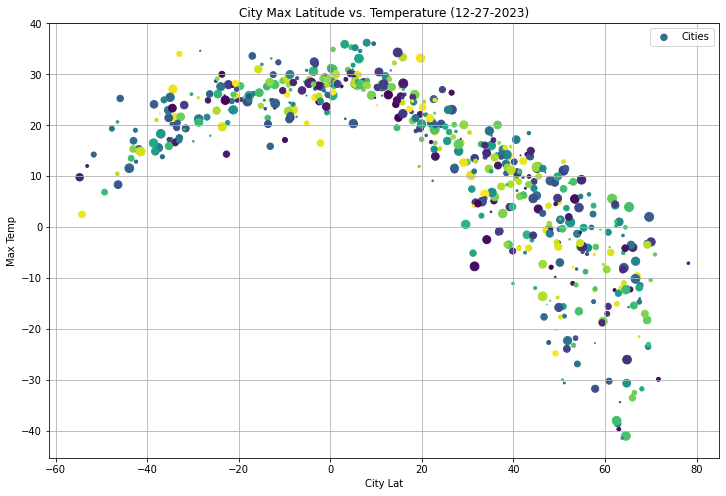

In [11]:
x=df['City Lat']
y=df['Max Temp']
N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.3  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Max Temp', c=colors, s=area, title='Latitude vs. Temp', grid=True, figsize=(12,8), label='Cities')
# plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.legend(loc='best')

# plt.title('Latitude vs. Temp')
plt.savefig("output/lat_vs_temp_s.png")

# Show plot
# plt.show()

# Latitude vs. Humidity

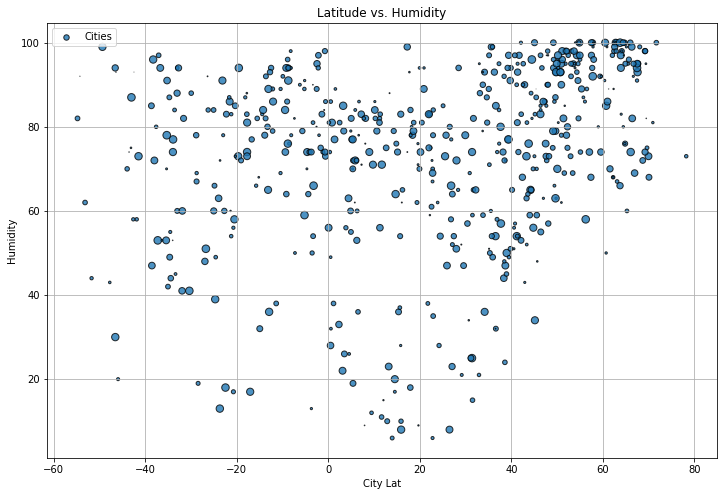

In [12]:

N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.2  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Humidity', edgecolor="black", linewidths=1, marker="o", alpha=0.8, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")


# plt.title('Latitude vs. Temp')
plt.savefig("output/lat_vs_hum_s.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness

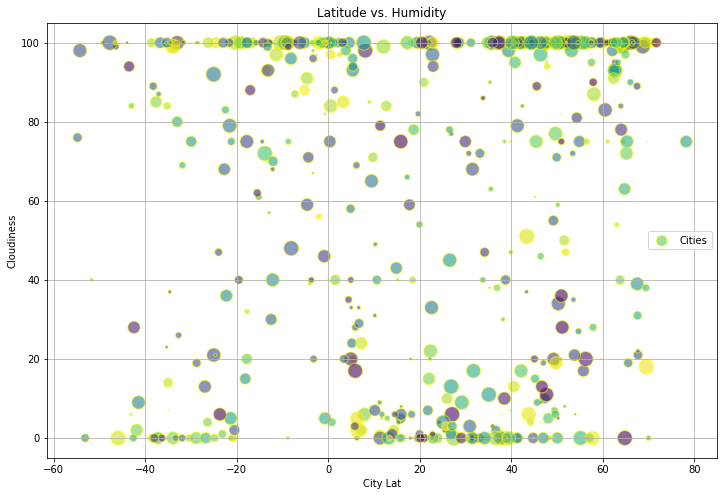

In [13]:

N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.6  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Cloudiness', edgecolor="yellow", c=colors, linewidths=1, marker="o", alpha=0.6, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")


# plt.title('Latitude vs. Temp')
plt.savefig("output/lat_vs_clouds_s.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

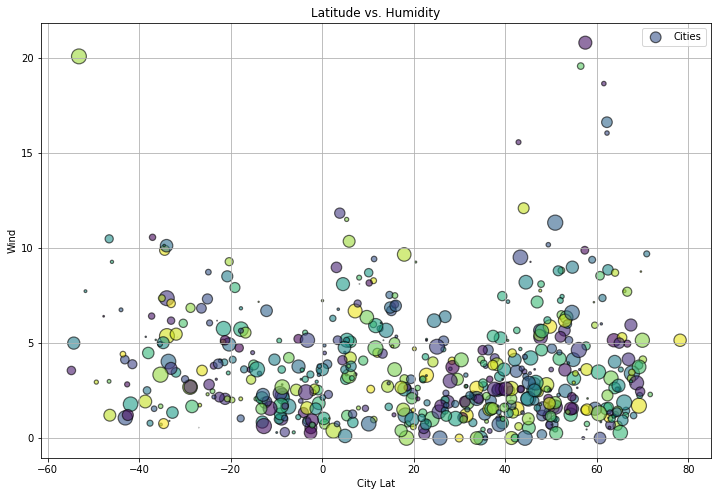

In [14]:
N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.6  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Wind', edgecolor="black", c=colors, linewidths=1.2, marker="o", alpha=0.6, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")


# plt.title('Latitude vs. Temp')
plt.savefig("output/lat_vs_clouds_s.png")

# Show plot
plt.show()

# Southern Hemisphere DF

In [15]:
# Northern Hemisphere
# (n_humidity_slope, n_humidity_intercept, n_humidity_r_val, _, _) = linregress(northern_hemisphere["Lat"], 
#                                                            northern_hemisphere["Humidity"])

# regr_line_x = np.array([a for a in range(80)])
# regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

# n_humidity_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
#                                        y="Humidity", 
#                                        title="Humidity vs. Lat")                 

# n_humidity_axes.plot(regr_line_x, regr_line_y, 'r')

# print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
#       .format(n_humidity_slope, n_humidity_intercept))
# print("The r-squared correlation coefficient for this line is {:.2f}".format(n_humidity_r_val))
# n_humidity_axes.get_figure().savefig("Fig7.png")

In [16]:
s_df=df.loc[df['City Lat']<=0]
s_df.sample(5)

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
287,Chipata,ZM,-13.6333,32.6500,20.25,1.92,1703680731,92,100,light rain
273,Lorengau,PG,-2.0226,147.2712,27.64,2.39,1703680728,78,56,broken clouds
243,Ndungu,TZ,-4.3667,38.0500,28.83,3.58,1703680720,64,71,light rain
198,Las Heras,AR,-46.5419,-68.9359,20.66,10.47,1703680708,30,100,overcast clouds
310,Forbes,AU,-33.3833,148.0167,20.51,0.90,1703680736,45,0,clear sky


# Northern Hemisphere DF

In [17]:
n_df=df.loc[df['City Lat']>=0]
n_df.sample(5)

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
237,Bodaybo,RU,57.8506,114.1933,-31.76,0.74,1703680718,99,28,scattered clouds
62,Jieshi,CN,22.8134,115.8257,18.85,5.19,1703680672,70,100,overcast clouds
469,Bordighera,IT,43.7806,7.6645,14.97,1.34,1703680783,76,6,clear sky
518,Esim,GH,4.8699,-2.2405,30.92,4.75,1703680794,60,58,broken clouds
322,Lukhovitsy,RU,54.9728,39.0361,-3.81,2.91,1703680738,97,100,overcast clouds


In [18]:
import seaborn as sns
from scipy import stats
sns.set_theme(color_codes=True)

In [29]:
def sns_reg_plot(x, y, dataframe, title ):

    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    # use line_kws to set line label for legend
    ax = sns.regplot(x=x, y=y, data=dataframe, color='b', 
                     scatter_kws={"color": "black"},
                     line_kws={"color": "red",'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    res = stats.linregress(x, y)
    print(f"R-squared: {res.rvalue**2:.6f}")
    ax.figure.set_size_inches(12, 9)
    # plot legend
    ax.legend()
    plt.title(title)
    ax.figure.savefig(f'output/{title}.jpg')
    plt.show()



#  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.732394


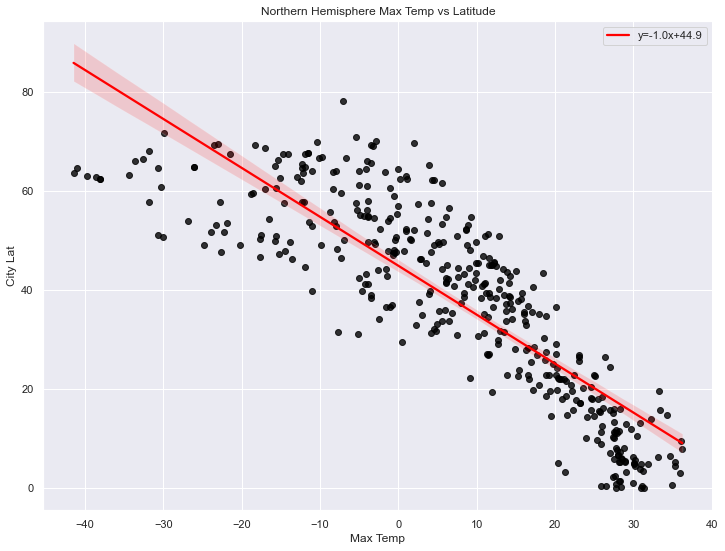

In [30]:
#Northern Hemisphere Temp vs Lat
x=n_df['Max Temp']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Max Temp vs Latitude"


sns_reg_plot(x, y, dataframe, title="Northern Hemisphere Max Temp vs Latitude")

R-squared: 0.449375


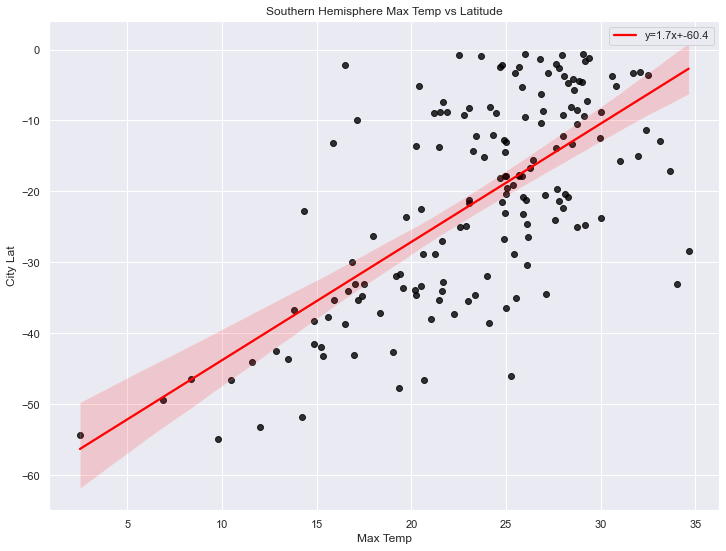

In [31]:
## SOUTHERN HEMISPHERE
x=s_df['Max Temp']
y=s_df['City Lat']
dataframe=s_df
title="Southern Hemisphere Max Temp vs Latitude"


sns_reg_plot(x, y, dataframe, title)

# Humidity vs. Latitude Linear Regression Plot

R-squared: 0.218857


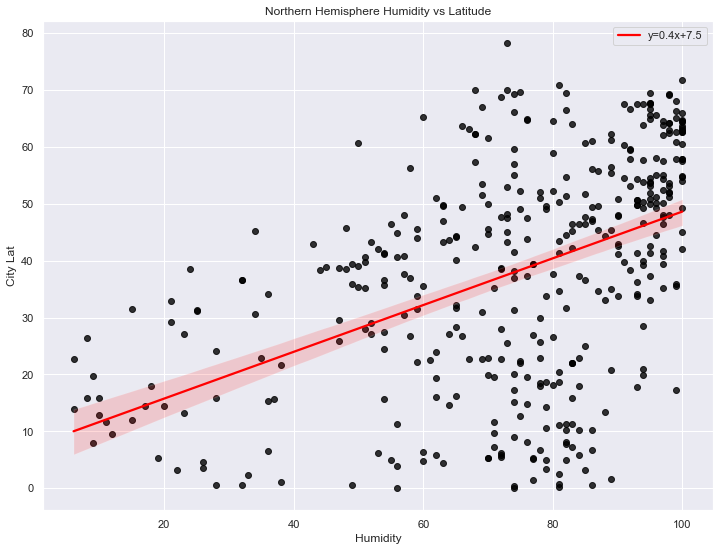

In [37]:
x=n_df['Humidity']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Humidity vs Latitude"


sns_reg_plot(x, y, dataframe, title)

R-squared: 0.034881


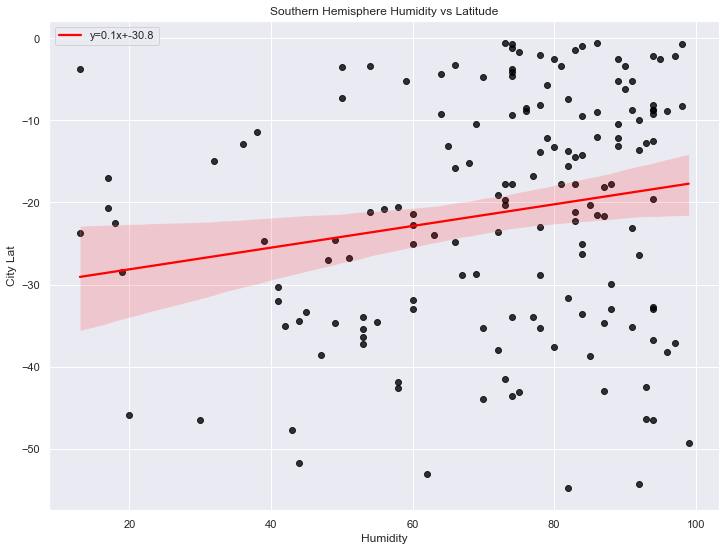

In [38]:
x=s_df['Humidity']
y=s_df['City Lat']
dataframe=n_df
title="Southern Hemisphere Humidity vs Latitude"


sns_reg_plot(x, y, dataframe, title)

# Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.084616


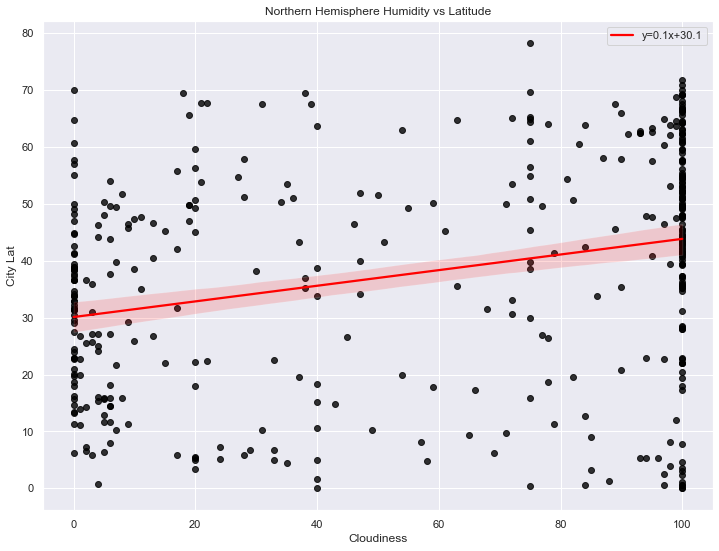

In [41]:
# Linear regression on Northern Hemisphere
x=n_df['Cloudiness']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Cloudiness vs Latitude"


sns_reg_plot(x, y, dataframe, title)

R-squared: 0.065851


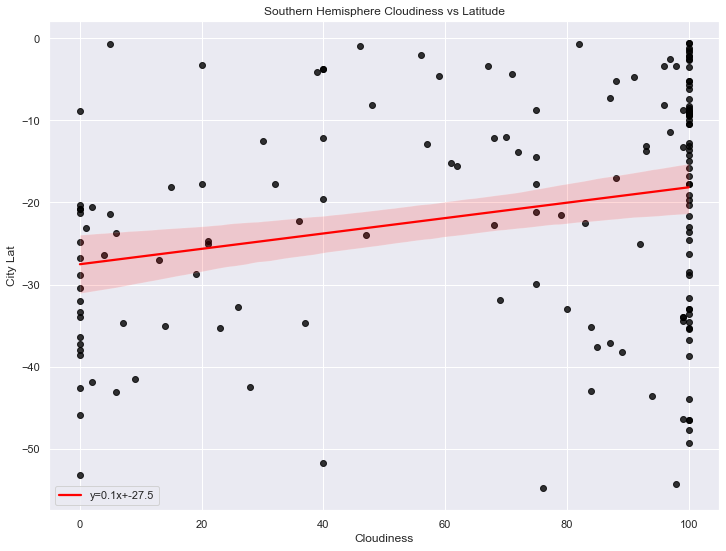

In [42]:
# Linear regression on Southern Hemisphere

x=s_df['Cloudiness']
y=s_df['City Lat']
dataframe=n_df
title="Southern Hemisphere Cloudiness vs Latitude"


sns_reg_plot(x, y, dataframe, title)

# Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.000020


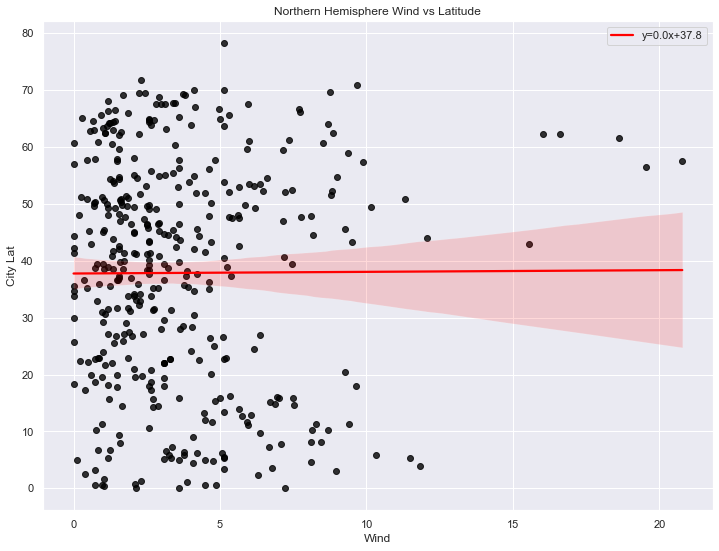

In [43]:

# Linear regression on Northern Hemisphere
x=n_df['Wind']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Wind vs Latitude"


sns_reg_plot(x, y, dataframe, title)

R-squared: 0.161792


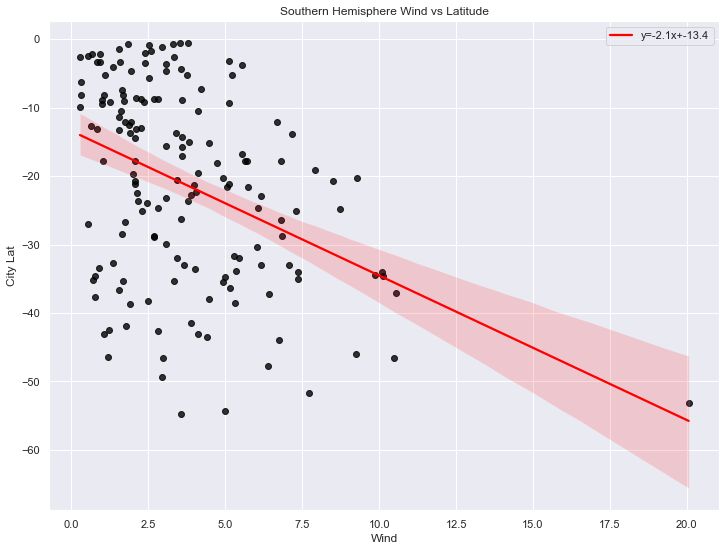

In [44]:
# Linear regression on Southern Hemisphere
x=s_df['Wind']
y=s_df['City Lat']
dataframe=s_df
title="Southern Hemisphere Wind vs Latitude"


sns_reg_plot(x, y, dataframe, title)

### Two other function options - matplotlib only: 

In [36]:
# # Function to call on various scatter plot combinations

# def scatter_plotter(x, y, title):
#     (temp_slope, temp_intercept, temp_r_val, _, _) = linregress(x, y)

#     temp_axes = plt.scatter(x, y,) 
#     plt.title(title)                                   
#     regr_line_x = x * temp_slope + temp_intercept
    
#     plt.plot(x,regr_line_x,"r-")
  

#     print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
#           .format(temp_slope, temp_intercept))
#     print("The r-squared correlation coefficient for this line is {:.2f}".format(temp_r_val))
#     temp_axes.get_figure().savefig(f"output/{title}.jpg")

In [ ]:
# Define a function to create Linear Regression plots
# def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
#     # Compute linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#     # Plot
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
#     plt.xlabel("Latitude")
#     plt.ylabel(title)
#     print(f"The r-value is: {rvalue**2}")
#     plt.show()